# Car Selling Price Prediction

### Purpose


To vizualize the relationship between actual prices and predicted prices of cars to be sold and predict the factors on which the selling price of car depends upon.



### Data

Data is a list of cars and its effective columns in csv format imported from kaggle and the source is cardekho.com.  

### Libraries to be used

**1. NumPy**    
**2. Pandas**   
**3. Matplotlib**   
**4. Seaborn**    
**5. Sklearn**  

## Importing Libraries

In [2]:
import numpy as np #linear algebra
import pandas as pd #data processing, CSV I/O (pd.read_csv)

#Data visualization

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#surpress warnings

import warnings 
warnings.filterwarnings('ignore')

In [3]:
# loading the data from csv file to pandas dataframe
car_data = pd.DataFrame(pd.read_csv('car data.csv'))

# inspecting the first 5 rows of the DataFrame
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Exploratory Analysis

In [4]:
# checking the number of rows and columns
print('Shape of Given Data: ',car_data.shape)

Shape of Given Data:  (301, 9)


In [6]:
# checking the car names using value_count() for Car_Name column
car_data['Car_Name'].value_counts()

city                   26
corolla altis          16
verna                  14
fortuner               11
brio                   10
                       ..
Bajaj  ct 100           1
KTM RC390               1
TVS Sport               1
s cross                 1
Hero Super Splendor     1
Name: Car_Name, Length: 98, dtype: int64

There are total 301 cars in the list among which 98 varieties of car are there with 'City' car as top sold.

In [7]:
# getting some information about the dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# getting descriptive information from the dataset
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
# checcking the number of missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

No missing values are present in dataset.

In [11]:
# checking the distribution of categorical data

print(car_data['Fuel_Type'].value_counts())
print(car_data['Seller_Type'].value_counts())
print(car_data['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In Fuel Type, Petrol cars are the highest among all of the fuel types and CNG with only 2 cars.  

In case of Seller types, Dealers are maximum than the Individual seller of cars.    

**Transmission moves the power from the engine to the wheels, like gearbox.**  
Manual Transmission cars are cars with the gearbox in it whereas Automatic Transmission cars are the gearless cars.   
Max number of the cars are Manually Transmissioned.  

## Encoding the Categorical Data

Encoding is a method to concatenate the object data into numeric form.  

Therefore, Fuel_Types, Seller_Types and Transmission data can be encoded in numeric form as    
**Fuel_Type** :  Petrol:0 , Diesel:1 , CNG:2    
**Seller_Type** : Dealer:0  , Individual:1    
**Transmission** : Manual:0 , Automatic:1  


In [12]:
#encoding fuel_type column
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#encoding seller_type column
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#encoding transmission column
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [13]:
car_data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,0.053643,-0.039896,-0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,0.509467,-0.550724,0.367128,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.440415,-0.512030,0.348715,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.166801,-0.101419,0.162510,0.089216
Fuel_Type,0.053643,0.509467,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.055705
Seller_Type,-0.039896,-0.550724,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.124269
Transmission,-0.000394,0.367128,0.348715,0.162510,0.080466,-0.063240,1.000000,0.050316
Owner,-0.182104,-0.088344,0.008057,0.089216,-0.055705,0.124269,0.050316,1.000000


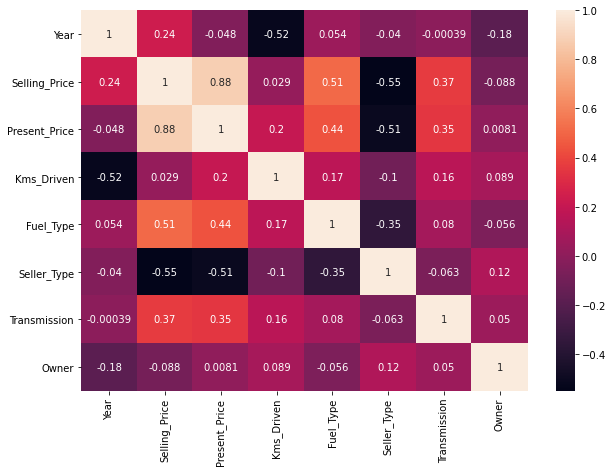

In [14]:
# vizualising the heatmap of correlation coefficients among the columns of car data

plt.figure(figsize=(10,7))
sns.heatmap(car_data.corr(),annot=True)
plt.show()

## Training and Testing Data


### Model Building


**Performing Simple Linear Regression**    

Equation of linear regression:    

y=c+m1x1+m2x2+...+mnxn;       
y is the response;   
c is the intercept;    
m1 is the coefficient for the first feature;       
mn is the coefficient for the nth feature;       

The m values are called the model coefficients or model parameters.        

We first assign the feature variable in this case to the variable X and the response variable to the variable y.  

In [15]:
# assigning the variable columns to the variable

X = car_data.drop(['Car_Name','Selling_Price'],axis=1)
y = car_data['Selling_Price']

### Train-Test Split

   

In this, we need to split our variable into training and testing sets. We will perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset.    



In [16]:
# importing train_test_split from the sklearn.model_selection library.

from sklearn.model_selection import train_test_split

In [17]:
# applying train_test_split to the assigned variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99)

In [18]:
# importing LinearRegression from sklearn.linearmodel library
from sklearn.linear_model import LinearRegression

#assigning a variable 'lm' to the imported library
lm = LinearRegression()

In [19]:
# fit the model using training part of data

lm.fit(X_train,y_train)

LinearRegression()

In [20]:
# value of intercept "c"
print("c: ",lm.intercept_)

c:  -448.03199498215685


In [21]:
# coefficient of lm model

print('Coefficients:',lm.coef_)

Coefficients: [ 2.23413246e-01  5.73283925e-01 -4.78034071e-05  1.60441149e+00
 -7.07028714e-01  1.16011291e-01 -4.24007210e-01]


## Predicting Train & Test Data

**After we have fit our model, let's evaluate its performance by predicting off the train values.**

In [22]:
# predicting the model using predict(feature variable train part)

predictions = lm.predict(X_train)
predictions

array([ 6.00797768e+00,  6.56665920e+00,  6.21898603e-03,  4.09468497e+00,
        4.89872192e+00,  5.15626846e+00,  5.32903971e+00,  7.94348943e+00,
        1.97667618e+00,  4.17257677e+00,  6.78159518e-01,  3.63386078e+00,
        1.23731802e+00,  2.65986552e+00,  7.07971477e+00,  7.26429127e+00,
        4.04914496e+00,  1.38070234e+01, -8.52373040e-01,  4.24219154e+00,
        5.08788027e+00,  1.14102388e+01,  1.33357772e+00,  6.71686193e+00,
        1.72589109e+01,  1.46654910e+00,  4.19170472e+00,  1.85865783e+00,
        1.43368940e+00,  6.63816118e+00,  8.10089515e+00,  6.57551200e+00,
        7.31725171e-01,  2.24083936e+00,  1.78395658e+00,  1.16463832e+00,
        5.75124432e+00,  9.95672615e+00,  9.26714218e+00,  6.90764035e+00,
        6.61105212e+00,  1.02165288e+01,  3.88554459e+00,  7.07191637e+00,
        2.57411478e-01,  7.85988337e+00,  4.23372068e+00,  1.15362953e+01,
        1.78608261e+00,  9.48552639e-01,  4.00805047e+00,  2.08832401e+00,
        1.18974924e+00,  

In [23]:
print(y_train)

209    4.85
265    6.50
174    0.38
241    4.75
214    5.25
       ... 
201    3.25
168    0.42
185    0.25
35     2.95
129    0.78
Name: Selling_Price, Length: 201, dtype: float64


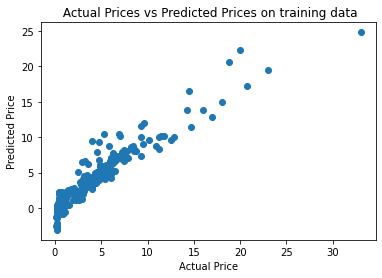

In [24]:
#vizualisation of train values of prices

plt.scatter(y_train,predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices on training data")
plt.show()

In [25]:
# predicting the model using predict(feature variable test part)

test_predictions  = lm.predict(X_test)
test_predictions

array([  4.55428314,   1.07509547,   0.62741846,   5.95892149,
         1.03850486,   6.67283101,  10.93275117,   8.10370657,
         4.18029658,  -0.20681485,   7.08806078,   7.90952443,
         4.03741759,   3.9421103 ,   6.26561417,   8.76881045,
        -1.29066658,   7.79653696,   0.58771874,   8.43337701,
        22.23464739,   6.55916001,  -0.19330914,   8.51021792,
         5.95625676,   5.49028538,   3.21275396,   4.37580562,
         2.36796786,  15.73874744,   2.71472432,   5.0458419 ,
         0.53392577,   3.8660093 ,  -2.58906799,   2.0799647 ,
         2.86194454,   2.42826068,   5.03185602,   5.07469354,
        -4.55114184,   2.10611557,   3.38259238,   6.01844414,
         4.61973633,   2.74538276,   7.25759879,   1.44483382,
         1.22193402,   8.75683168,  19.50220224,   6.33824881,
         5.43589897,  18.15157182,   5.82453306,   9.69064355,
         6.20475425,   5.90224742,   1.30240494,   1.78577234,
         0.64282802,   4.31121323,   1.82294064,   9.08

In [26]:
print(y_test)

10     2.85
121    1.05
44     1.25
43     5.50
118    1.10
       ... 
24     2.90
179    0.31
172    0.40
106    1.35
277    9.70
Name: Selling_Price, Length: 100, dtype: float64


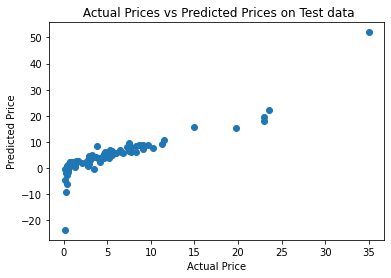

In [27]:
#vizualisation of test values of prices

plt.scatter(y_test,test_predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices on Test data")
plt.show()

## Model Evaluation

In [28]:
# importing metrices from sklearn library for model evaluation

from sklearn import metrics

### For Train Data

In [30]:
print('For Train Data')
#Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train,predictions))
#Mean squared error 
print('Mean Squared Error:', metrics.mean_squared_error(y_train,predictions))
#Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train,predictions)))
#explained variance score
print('Explained Variance Score:',metrics.explained_variance_score(y_train,predictions))
# R-squared error
print('R-squared error for train data:',metrics.r2_score(y_train,predictions))


For Train Data
Mean Absolute Error: 1.1237669340204568
Mean Squared Error: 2.5286426167219647
Root Mean Squared Error: 1.5901706250342964
Explained Variance Score: 0.8884649415629285
R-squared error for train data: 0.8884649415629285


### For Test Data

In [31]:
print('For Test Data')
#Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,test_predictions))
#Mean squared error 
print('Mean Squared Error:', metrics.mean_squared_error(y_test,test_predictions))
#Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,test_predictions)))
#explained variance score
print('Explained Variance Score:',metrics.explained_variance_score(y_test,test_predictions))
#'R-squared error for test data
print('R-squared error for test data: ',metrics.r2_score(y_test,test_predictions))


For Test Data
Mean Absolute Error: 1.5585141331655887
Mean Squared Error: 11.976397910522998
Root Mean Squared Error: 3.460693270216677
Explained Variance Score: 0.6281687281710713
R-squared error for test data:  0.6236623334401712


In [32]:
cdf = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coefficients'])
cdf

,Coefficients
Year,0.223413
Present_Price,0.573284
Kms_Driven,-0.000048
Fuel_Type,1.604411
Seller_Type,-0.707029
Transmission,0.116011
Owner,-0.424007


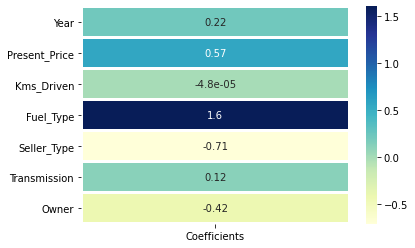

In [33]:
sns.heatmap(cdf,annot=True,linewidths=2,linecolor='white',cmap="YlGnBu")
plt.show()

## Conclusion

The Fuel type is the most relevant correlation among the Selling Price.    

The Present Price, Fuel Type and Transmisssion(a bit amount) are directly proportional to the Selling Price of the cars.     
These factors bring a positive effect in the selling price of cars as well whereas the Km/s driven is highly inversely proportional to the selling price and thus, the price goes down when the km/s is high.  